In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install statsmodels
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# ローカルレベルモデル

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import numpy as np

In [13]:
df = pd.read_csv('../data/Transport_amount_data.csv')
df['label'] = pd.to_datetime(df['label'])
df

,label,year,month,Transport_tonnage,number_parcels,Number_companies_1,Number_companies_2
0,2002-04-01,2002,4,5933686,218721,26,20
1,2002-05-01,2002,5,5474539,208283,26,20
2,2002-06-01,2002,6,5430018,218633,26,20
3,2002-07-01,2002,7,6345951,271764,26,20
4,2002-08-01,2002,8,5354671,217650,26,20
...,...,...,...,...,...,...,...
239,2022-03-01,2022,3,6118588,426615,24,14
240,2022-04-01,2022,4,5727532,387559,24,14
241,2022-05-01,2022,5,5102766,380692,24,14
242,2022-06-01,2022,6,5723215,411429,24,14


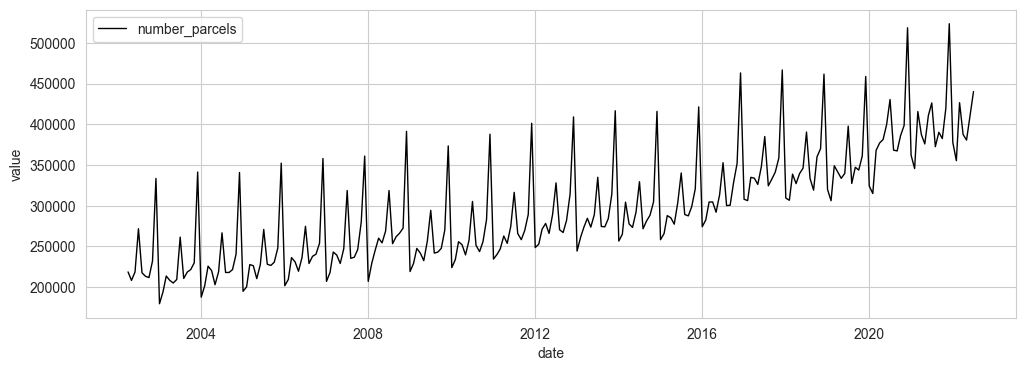

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 4))

# 原系列
sns.lineplot(data=df, x=df['label'], y=df['number_parcels'], label='number_parcels', color='black', lw=1.0)
#plt.title('')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()

In [15]:
df['sma12'] = df['number_parcels'].rolling(12).mean()
df

,label,year,month,Transport_tonnage,number_parcels,Number_companies_1,Number_companies_2,sma12
0,2002-04-01,2002,4,5933686,218721,26,20,NaN
1,2002-05-01,2002,5,5474539,208283,26,20,NaN
2,2002-06-01,2002,6,5430018,218633,26,20,NaN
3,2002-07-01,2002,7,6345951,271764,26,20,NaN
4,2002-08-01,2002,8,5354671,217650,26,20,NaN
...,...,...,...,...,...,...,...,...
239,2022-03-01,2022,3,6118588,426615,24,14,404079.333333
240,2022-04-01,2022,4,5727532,387559,24,14,404095.333333
241,2022-05-01,2022,5,5102766,380692,24,14,404489.250000
242,2022-06-01,2022,6,5723215,411429,24,14,404545.166667


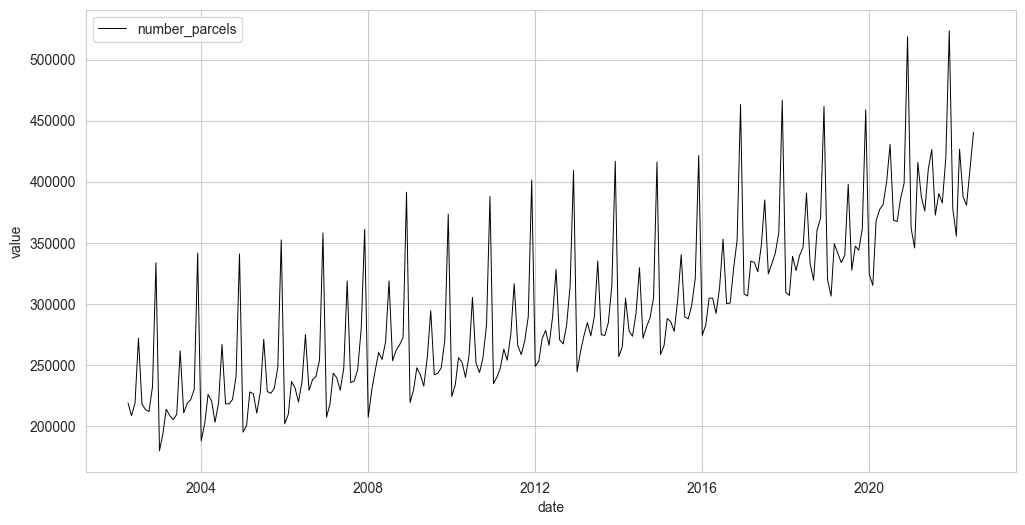

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# 原系列
sns.lineplot(data=df, x=df['label'], y=df['number_parcels'], label='number_parcels', color='black', lw=0.7)
# 単純移動平均
#sns.lineplot(data=df, x=df['label'], y=df['sma12'], label='sma12', color='blue', lw=0.7)
#plt.title('')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()

In [20]:
df['y'] = np.log(df['number_parcels'])
df

,label,year,month,Transport_tonnage,number_parcels,Number_companies_1,Number_companies_2,sma12,y
0,2002-04-01,2002,4,5933686,218721,26,20,NaN,12.295552
1,2002-05-01,2002,5,5474539,208283,26,20,NaN,12.246653
2,2002-06-01,2002,6,5430018,218633,26,20,NaN,12.295150
3,2002-07-01,2002,7,6345951,271764,26,20,NaN,12.512689
4,2002-08-01,2002,8,5354671,217650,26,20,NaN,12.290644
...,...,...,...,...,...,...,...,...,...
239,2022-03-01,2022,3,6118588,426615,24,14,404079.333333,12.963637
240,2022-04-01,2022,4,5727532,387559,24,14,404095.333333,12.867623
241,2022-05-01,2022,5,5102766,380692,24,14,404489.250000,12.849746
242,2022-06-01,2022,6,5723215,411429,24,14,404545.166667,12.927392


In [21]:
import numpy as np
import statsmodels.api as sm

class LocalLevelSeasonalModel(sm.tsa.statespace.MLEModel):
    """
    状態空間モデル: トレンド＋季節成分（周期12）
    """
    param_names = ['obs_error', 'trend_error', 'seasonal_error']
    positive_params = [0, 1, 2]
    start_params = [0, 0, 0.5]
    k_posdef = 2  # 状態誤差の次元数（トレンド成分と季節成分）

    def __init__(self, endog):
        """
        コンストラクタ
        :param endog: 観測データ（時系列）
        """
        # トレンド成分1 + 季節成分11個 = 状態数12
        super().__init__(endog=endog, k_states=12, k_posdef=self.k_posdef, initialization='diffuse')

        # デザイン行列 (トレンド + 季節成分の最初の1個)
        self.ssm['design'] = np.zeros((1, 12))
        self.ssm['design', 0, 0] = 1  # トレンド
        self.ssm['design', 0, 1] = 1  # 季節成分（最初の1個）

        # 観測切片なし
        self.ssm['obs_intercept'] = np.zeros((1, len(endog)))

        # 状態遷移行列
        self.ssm['transition'] = np.zeros((12, 12))
        self.ssm['transition', 0, 0] = 1  # トレンドはランダムウォーク
        self.ssm['transition', 1, 1:] = -1  # ここを変更!
        self.ssm['transition', 2, 1] = 1
        self.ssm['transition', 3, 2] = 1
        self.ssm['transition', 4, 3] = 1
        self.ssm['transition', 5, 4] = 1
        self.ssm['transition', 6, 5] = 1
        self.ssm['transition', 7, 6] = 1
        self.ssm['transition', 8, 7] = 1
        self.ssm['transition', 9, 8] = 1
        self.ssm['transition', 10, 9] = 1
        self.ssm['transition', 11, 10] = 1

        # 選択行列 (状態ノイズ)
        self.ssm['selection'] = np.zeros((12, 2))
        self.ssm['selection', 0, 0] = 1  # トレンド成分にトレンド誤差
        self.ssm['selection', 1, 1] = 1  # 季節成分に季節誤差

    def transform_params(self, unconstrained):
        """非制約パラメータを制約付きパラメータに変換 (正の値)"""
        constrained = unconstrained.copy()
        constrained[self.positive_params] = unconstrained[self.positive_params] ** 2
        return constrained

    def untransform_params(self, constrained):
        """制約付きパラメータを非制約パラメータに変換"""
        unconstrained = constrained.copy()
        unconstrained[self.positive_params] = constrained[self.positive_params] ** 0.5
        return unconstrained

    def update(self, params, **kwargs):
        """パラメータを更新"""
        params = super().update(params, **kwargs)
        self['obs_cov', 0, 0] = params[0]  # 観測誤差
        self['state_cov', 0, 0] = params[1]  # トレンド誤差
        self['state_cov', 1, 1] = params[2]  # 季節誤差

In [22]:
# モデルのデータ準備
endog = df['y']

# モデルのインスタンス化
model = LocalLevelSeasonalModel(
    endog=endog,
)

# モデルのフィッティング
result_base = model.fit(disp=False)
print(result_base.summary())

                              Statespace Model Results                             
Dep. Variable:                           y   No. Observations:                  244
Model:             LocalLevelSeasonalModel   Log Likelihood                 471.943
Date:                     Thu, 22 May 2025   AIC                           -913.885
Time:                             10:12:43   BIC                           -861.428
Sample:                                  0   HQIC                          -892.758
                                     - 244                                         
Covariance Type:                       opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
obs_error          0.0002   4.86e-05      4.297      0.000       0.000       0.000
trend_error        0.0002   2.85e-05      5.917      0.000       0.000       0.

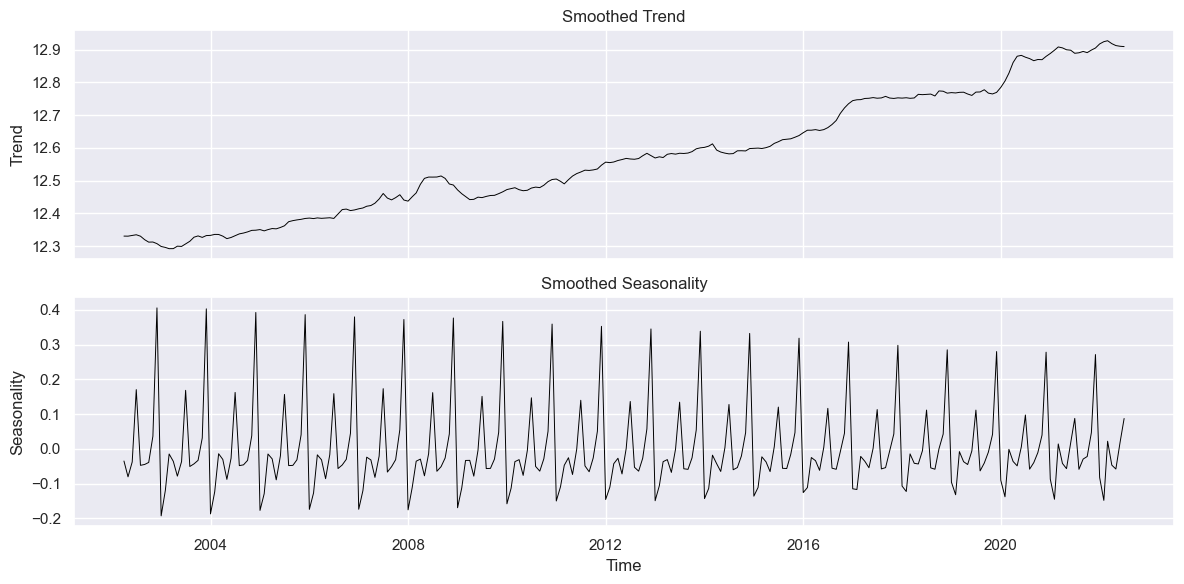

In [23]:
estimated_states = result_base.smoothed_state
trend = estimated_states[0]
seasonal = estimated_states[1]

result_df = pd.DataFrame({
    '日付': df['label'],
    '観測値': df['y'],
    'トレンド': trend,
    'トレンド+季節性': trend+seasonal,
    '季節性': seasonal})

# seabornスタイル
sns.set(style="darkgrid")

# 図の作成
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# トレンドのプロット
sns.lineplot(ax=axes[0], x=result_df['日付'], y=trend, color="black", lw=0.7)
#sns.lineplot(ax=axes[0], x=result_df['日付'], y=result_df['観測値'], color="black", lw=0.7)
axes[0].set_title('Smoothed Trend')
axes[0].set_ylabel('Trend')

# 季節成分のプロット
sns.lineplot(ax=axes[1], x=result_df['日付'], y=seasonal, color="black", lw=0.7)
axes[1].set_title('Smoothed Seasonality')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Seasonality')

plt.tight_layout()
plt.show()

In [24]:
estimated_states = result_base.smoothed_state
trend = estimated_states[0]
seasonal = estimated_states[1]

result_df = pd.DataFrame({
    '日付': df['label'],
    '観測値': df['y'],
    'トレンド': trend,
    'トレンド+季節性': trend+seasonal,
    '季節性': seasonal
})
result_df_melted = result_df.melt(
    id_vars='日付',
    var_name='decomposition',
    value_name='対数系列'
).sort_values(by='日付')

fig = px.line(
    data_frame = result_df_melted,
    x = '日付',
    y = '対数系列',
    color = 'decomposition'
)
fig.show()

In [25]:
df['y']

0      12.295552
1      12.246653
2      12.295150
3      12.512689
4      12.290644
         ...    
239    12.963637
240    12.867623
241    12.849746
242    12.927392
243    12.995309
Name: y, Length: 244, dtype: float64

In [26]:
trend+seasonal

array([12.29531661, 12.24971848, 12.2947808 , 12.50488186, 12.28271437,
       12.27448076, 12.27283803, 12.34871003, 12.71295752, 12.10586827,
       12.17619223, 12.27713167, 12.25603876, 12.22101165, 12.26227083,
       12.47475628, 12.26368735, 12.28389346, 12.29788074, 12.35782996,
       12.73479768, 12.14537967, 12.2118456 , 12.32129176, 12.29973993,
       12.23478014, 12.29906825, 12.49398622, 12.28884927, 12.29369404,
       12.30997388, 12.38575527, 12.74081368, 12.17311179, 12.21724921,
       12.3353194 , 12.32454968, 12.26341178, 12.33669953, 12.51849381,
       12.32620462, 12.33002858, 12.34823281, 12.4223534 , 12.77048851,
       12.21126889, 12.25692293, 12.36871213, 12.35296575, 12.29958601,
       12.36972406, 12.54321322, 12.34134219, 12.36496529, 12.38268232,
       12.45316591, 12.79005842, 12.23990413, 12.2960542 , 12.39762432,
       12.39181699, 12.34880834, 12.4227958 , 12.63370388, 12.37970072,
       12.38981975, 12.41659617, 12.51183506, 12.81272704, 12.26

In [27]:
# 残差の計算
H = model.ssm['design'][0]  # H

# 事前推定値 (one-step-ahead predictions) を取得
predicted_states = result_base.predicted_state

# 残差の計算（事前推定値を使用）
predicted_y_prior = H @ predicted_states  # Hx_{n|n-1}

# predicted_y_prior の最後の要素を削除して形状を合わせる
predicted_y_prior = predicted_y_prior[:-1]

residuals = endog - predicted_y_prior

residuals_df = pd.DataFrame({
    'Time': df.index,
    'Residuals': residuals
})
residuals_df

,Time,Residuals
0,0,12.295552
1,1,12.246653
2,2,6.147374
3,3,4.315789
4,4,3.014796
...,...,...
239,239,0.041585
240,240,-0.027313
241,241,-0.023431
242,242,-0.007643


In [28]:
residuals_df[:20]

,Time,Residuals
0,0,12.295552
1,1,12.246653
2,2,6.147374
3,3,4.315789
4,4,3.014796
5,5,2.391634
6,6,1.985791
7,7,1.794111
8,8,1.932217
9,9,1.098670


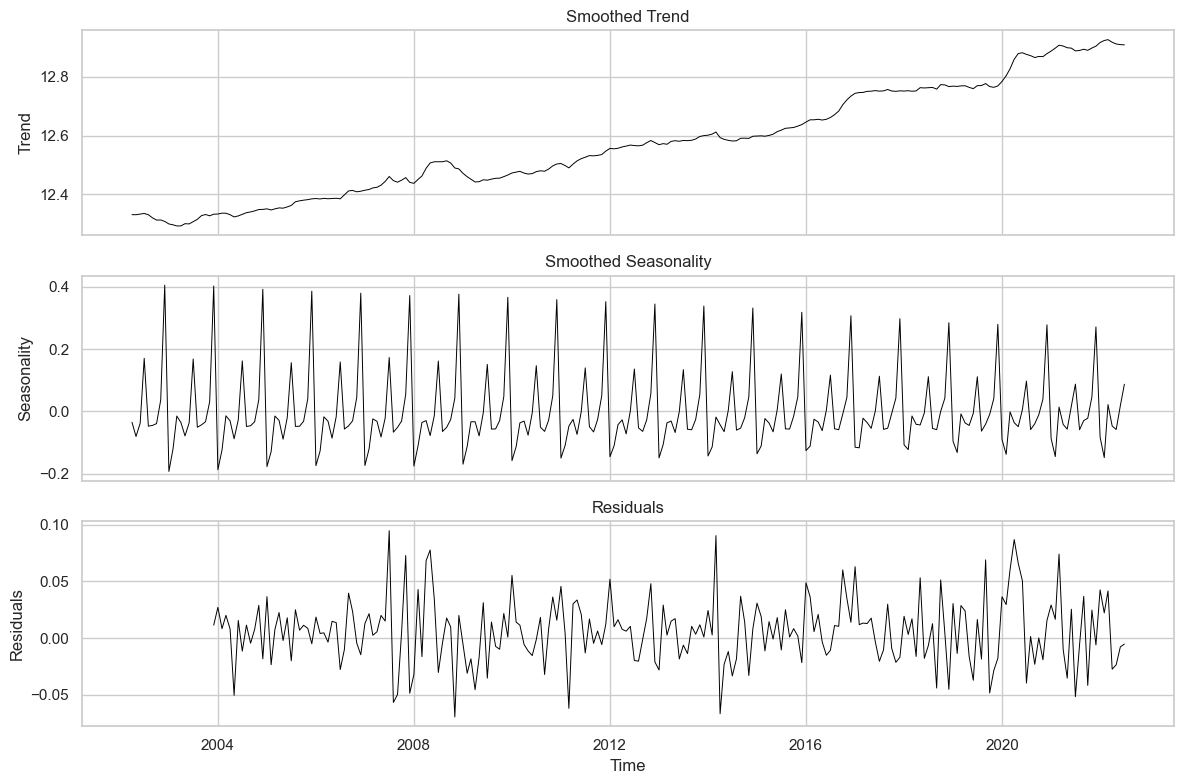

In [29]:
estimated_states = result_base.smoothed_state
trend = estimated_states[0]
seasonal = estimated_states[1]

result_df = pd.DataFrame({
    '日付': df['label'],
    '観測値': df['y'],
    'トレンド': trend,
    'トレンド+季節性': trend+seasonal,
    '季節性': seasonal})

# seabornスタイル
sns.set(style="whitegrid")

# 図の作成
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# トレンドのプロット
sns.lineplot(ax=axes[0], x=result_df['日付'], y=trend, color="black", lw=0.7)
#sns.lineplot(ax=axes[0], x=result_df['日付'], y=result_df['観測値'], color="black", lw=0.7)
axes[0].set_title('Smoothed Trend')
axes[0].set_ylabel('Trend')

# 季節成分のプロット
sns.lineplot(ax=axes[1], x=result_df['日付'], y=seasonal, color="black", lw=0.7)
axes[1].set_title('Smoothed Seasonality')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Seasonality')

# 残差のプロット
sns.lineplot(ax=axes[2], x=result_df['日付'], y=residuals_df['Residuals'][20:], color="black", lw=0.7)
axes[2].set_title('Residuals')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [30]:
from statsmodels.tsa.statespace.structural import UnobservedComponents

ucm = UnobservedComponents(
    endog=df['y'],
    level='local linear trend',
    seasonal=12,
)
res_ucm = ucm.fit(disp=False)

# get_forecast が使える
fc = res_ucm.get_forecast(steps=48)
fc_df = fc.summary_frame()
fc_df

c:\Users\fugat\Desktop\python_project\Transport_amount_project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



y,mean,mean_se,mean_ci_lower,mean_ci_upper
244,12.856966,0.028949,12.800226,12.913705
245,12.887486,0.030305,12.828090,12.946882
246,12.897526,0.032398,12.834028,12.961024
247,12.968446,0.034405,12.901013,13.035879
248,13.195880,0.036321,13.124692,13.267068
249,12.844704,0.038154,12.769924,12.919484
250,12.782201,0.039909,12.703980,12.860422
251,12.954619,0.041590,12.873105,13.036134
252,12.888539,0.043184,12.803900,12.973178
253,12.879255,0.044655,12.791734,12.966777


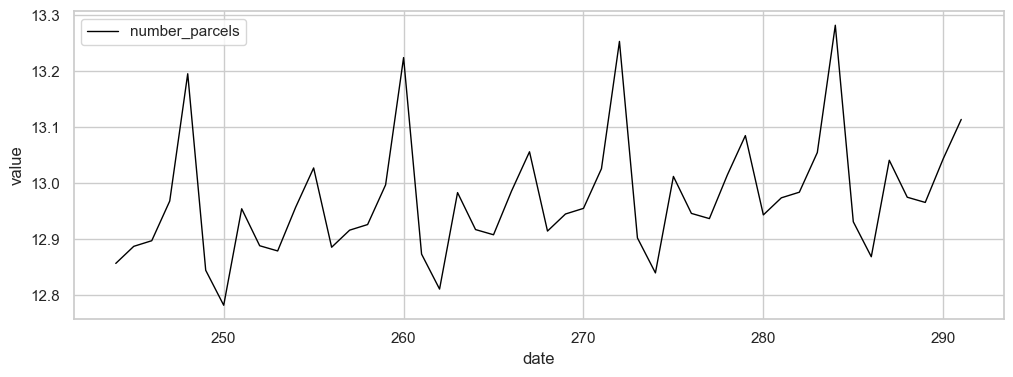

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 4))

# 原系列
sns.lineplot(x=fc_df.index, y=fc_df['mean'], label='number_parcels', color='black', lw=1.0)
#plt.title('')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()

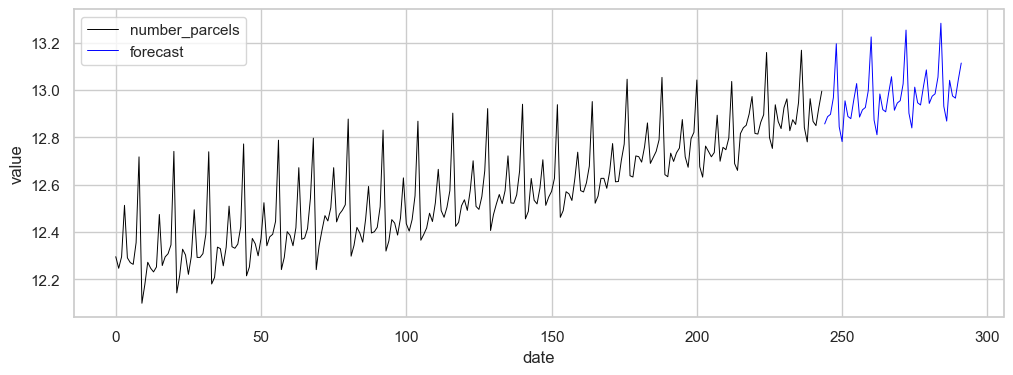

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 前提 ---
# df['y']           : 実測値（時系列）
# fc_df['forecast'] : 予測結果（DataFrame、先頭行は予測の1ステップ目）

# 1. 観測値の最後のタイムインデックスと値
last_idx   = df.index[-1]
last_value = df['y'].iloc[-1]

# 2. 予測の1ステップ目のタイムインデックスと値
first_fc_idx   = fc_df.index[0]
first_fc_value = fc_df['mean'].iloc[0]

# 3. 結合用 Series を作成
combined = pd.Series(
    [last_value, first_fc_value],
    index=[last_idx, first_fc_idx]
)

# プロット
sns.set_style('whitegrid')
plt.figure(figsize=(12, 4))

# 原系列
sns.lineplot(x=df.index, y=df['y'], label='number_parcels', color='black', lw=0.7)
# 予測
sns.lineplot(x=fc_df.index, y=fc_df['mean'], label='forecast', color='blue', lw=0.7)
#plt.title('')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()

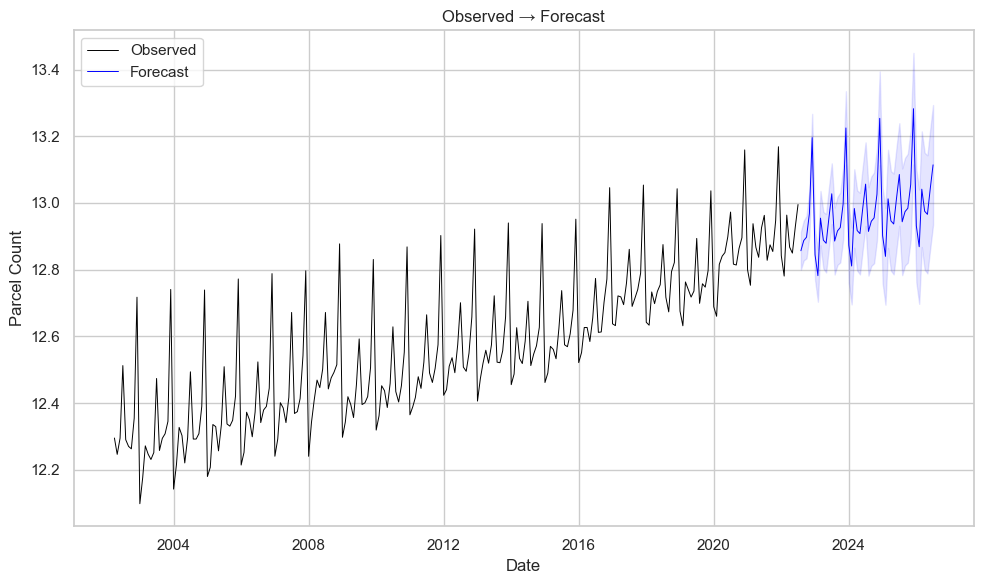

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# --- 準備 ---
# 1) df['label'] を datetime に変換してインデックスに
df_plot = df.copy()
df_plot['label'] = pd.to_datetime(df_plot['label'])
df_plot.set_index('label', inplace=True)

# 2) fc_df のインデックスを未来の月初に設定（2022-08-01 から）
#    df_plot の最終日時 + MonthBegin(1) をスタートに
h = len(fc_df)
start = df_plot.index[-1] + pd.offsets.MonthBegin(1)
future_idx = pd.date_range(start=start, periods=h, freq='MS')
fc_df = fc_df.copy()
fc_df.index = future_idx

# --- プロット ---
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# 実測値
sns.lineplot(
    x=df_plot.index,
    y=df_plot['y'],
    label='Observed',
    color='black',
    lw=0.7
)

# 予測平均
sns.lineplot(
    x=fc_df.index,
    y=fc_df['mean'],
    label='Forecast',
    color='blue',
    lw=0.7
)

# 95% 信頼区間
plt.fill_between(
    fc_df.index,
    fc_df['mean_ci_lower'],
    fc_df['mean_ci_upper'],
    color='blue',
    alpha=0.1
)

plt.xlabel('Date')
plt.ylabel('Parcel Count')
plt.title('Observed → Forecast')
plt.legend()
plt.tight_layout()
plt.show()

## テスト

In [34]:
smoothed_states = result_base.smoothed_state  # shape = (k_states, T)
smoothed_trend = smoothed_states[0]
smoothed_seasonal = smoothed_states[1]

def forecast_mlemodel(res, steps=24):
    transition = res.model.ssm['transition']
    design     = res.model.ssm['design']
    # 最終時点の平滑化状態を初期化
    state = res.smoothed_state[:, -1].copy()
    forecasts = []

    for _ in range(steps):
        # 観測の点予測
        forecasts.append(float(design @ state))
        # 状態を1ステップ進める
        state = transition @ state

    return np.array(forecasts)

# まず transition を修正してから再フィット or update してください
# その上で
fc_vals = forecast_mlemodel(result_base, steps=60)
fc_vals

C:\Users\fugat\AppData\Local\Temp\ipykernel_40140\999091047.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



array([12.99656648, 12.85069636, 12.87985025, 12.88722647, 12.95616204,
       13.18060647, 12.82681786, 12.76096929, 12.93113486, 12.86237679,
       12.85119267, 12.92776734, 12.99656648, 12.85069636, 12.87985025,
       12.88722647, 12.95616204, 13.18060647, 12.82681786, 12.76096929,
       12.93113486, 12.86237679, 12.85119267, 12.92776734, 12.99656648,
       12.85069636, 12.87985025, 12.88722647, 12.95616204, 13.18060647,
       12.82681786, 12.76096929, 12.93113486, 12.86237679, 12.85119267,
       12.92776734, 12.99656648, 12.85069636, 12.87985025, 12.88722647,
       12.95616204, 13.18060647, 12.82681786, 12.76096929, 12.93113486,
       12.86237679, 12.85119267, 12.92776734, 12.99656648, 12.85069636,
       12.87985025, 12.88722647, 12.95616204, 13.18060647, 12.82681786,
       12.76096929, 12.93113486, 12.86237679, 12.85119267, 12.92776734])

In [35]:
transition = result_base.model.ssm['transition']
np.linalg.eigvals(transition)

array([ 8.66025404e-01+0.5j      ,  8.66025404e-01-0.5j      ,
        5.00000000e-01+0.8660254j,  5.00000000e-01-0.8660254j,
        4.44089210e-16+1.j       ,  4.44089210e-16-1.j       ,
       -1.00000000e+00+0.j       , -8.66025404e-01+0.5j      ,
       -8.66025404e-01-0.5j      , -5.00000000e-01+0.8660254j,
       -5.00000000e-01-0.8660254j,  1.00000000e+00+0.j       ])

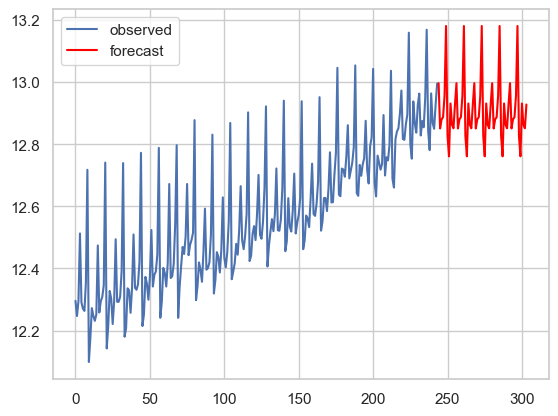

In [36]:
import matplotlib.pyplot as plt

plt.plot(df['y'], label='observed')
plt.plot(range(len(df), len(df) + 60), fc_vals, label='forecast', color='red')
plt.legend()
plt.show()

# 線形トレンド

In [37]:
import numpy as np
import statsmodels.api as sm

class LocalLinearTrendSeasonalModel(sm.tsa.statespace.MLEModel):
    """
    トレンド(レベル+傾き) + 周期12の季節性
    """
    param_names = ['obs_error','level_noise','slope_noise','seasonal_noise']
    positive_params = [0,1,2,3]
    start_params = [0.01,0.01,0.001,0.001]
    k_posdef = 3  # level, slope, seasonal の誤差

    def __init__(self, endog):
        # 状態数 = 2 (level,slope) + 11 (seasonal) = 13
        super().__init__(endog=endog, k_states=13, k_posdef=self.k_posdef, initialization='diffuse')

        # design 
        self.ssm['design'] = np.zeros((1,13))
        self.ssm['design',0,0] = 1  # level
        self.ssm['design',0,2] = 1  # seasonal first component

        # transition
        T = np.zeros((13,13))
        # level-slope block
        T[0,0], T[0,1] = 1, 1
        T[1,1] = 1
        # seasonal sum-to-zero
        T[2,2:] = -1
        for i in range(3,13):
            T[i,i-1] = 1
        self.ssm['transition'] = T

        # selection
        S = np.zeros((13,3))
        S[0,0] = 1  # level noise
        S[1,1] = 1  # slope noise
        S[2,2] = 1  # seasonal noise
        self.ssm['selection'] = S

    def transform_params(self, unconstrained):
        c = unconstrained.copy()
        c[self.positive_params] = c[self.positive_params]**2
        return c

    def untransform_params(self, constrained):
        u = constrained.copy()
        u[self.positive_params] = constrained[self.positive_params]**0.5
        return u

    def update(self, params, **kwargs):
        params = super().update(params, **kwargs)
        # 観測誤差
        self['obs_cov',0,0]   = params[0]
        # state noise
        self['state_cov',0,0] = params[1]
        self['state_cov',1,1] = params[2]
        self['state_cov',2,2] = params[3]

In [38]:
# モデルのデータ準備
endog = df['y']

# モデルのインスタンス化
model = LocalLinearTrendSeasonalModel(
    endog=endog,
)

# モデルのフィッティング
result_linear= model.fit(disp=False)
print(result_linear.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  244
Model:             LocalLinearTrendSeasonalModel   Log Likelihood                 469.451
Date:                           Thu, 22 May 2025   AIC                           -904.902
Time:                                   10:12:45   BIC                           -845.450
Sample:                                        0   HQIC                          -880.958
                                           - 244                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
obs_error          0.0002   4.94e-05      4.711      0.000       0.000       0.000
level_noise        0.0001   2.9

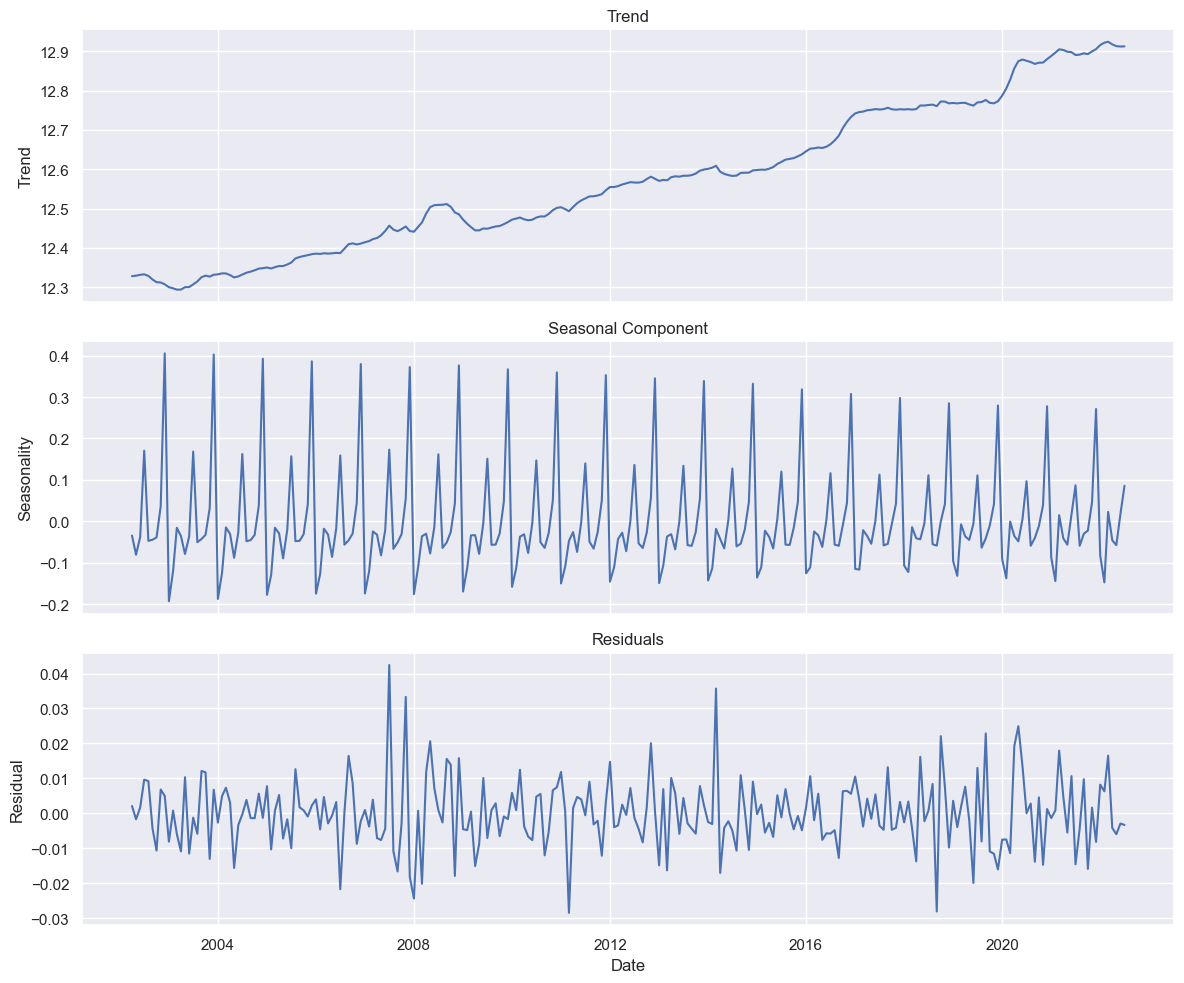

In [39]:
smoothed = result_linear.smoother_results
trend_smoothed = smoothed.smoothed_state[0]
seasonal_smoothed = smoothed.smoothed_state[2]

# （トレンド + 季節性）
reconstructed = trend_smoothed + seasonal_smoothed

# 残差
residuals = df['y'].values - reconstructed

sns.set_style('darkgrid')

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# トレンド
sns.lineplot(x=df['label'], y=trend_smoothed, ax=axes[0])
axes[0].set_title('Trend')
axes[0].set_ylabel('Trend')

# 季節成分
sns.lineplot(x=df['label'], y=seasonal_smoothed, ax=axes[1])
axes[1].set_title('Seasonal Component')
axes[1].set_ylabel('Seasonality')

# 残差
sns.lineplot(x=df['label'], y=residuals, ax=axes[2])
axes[2].set_title('Residuals')
axes[2].set_ylabel('Residual')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [40]:
import plotly.graph_objects as go
import plotly.io as pio

# x軸
x = df['label']

# 各系列のトレース
fig = go.Figure()

# トレンド
fig.add_trace(go.Scatter(x=x, y=trend_smoothed, mode='lines', name='Trend'))

# 季節成分
fig.add_trace(go.Scatter(x=x, y=seasonal_smoothed, mode='lines', name='Seasonality'))

# 残差
fig.add_trace(go.Scatter(x=x, y=residuals, mode='lines', name='Residual'))

fig.update_layout(
    title='Trend, Seasonal Component, Residuals',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99, bordercolor="Black", borderwidth=1),
    height=500
)

fig.show()

pio.write_html(fig, file='output_plot.html', auto_open=False)

In [41]:
smoothed_states = result_linear.smoothed_state  # shape = (k_states, T)
smoothed_trend = smoothed_states[0]
smoothed_seasonal = smoothed_states[1]

def forecast_mlemodel(res, steps=36):
    transition = res.model.ssm['transition']
    design     = res.model.ssm['design']
    # 最終時点の平滑化状態を初期化
    state = res.smoothed_state[:, -1].copy()
    forecasts = []

    for _ in range(steps):
        # 観測の点予測
        forecasts.append(float(design @ state))
        # 状態を1ステップ進める
        state = transition @ state

    return np.array(forecasts)

# まず transition を修正してから再フィット or update してください
# その上で
fc_vals = forecast_mlemodel(result_base, steps=36)
fc_vals

C:\Users\fugat\AppData\Local\Temp\ipykernel_40140\2539698982.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



array([12.99656648, 12.85069636, 12.87985025, 12.88722647, 12.95616204,
       13.18060647, 12.82681786, 12.76096929, 12.93113486, 12.86237679,
       12.85119267, 12.92776734, 12.99656648, 12.85069636, 12.87985025,
       12.88722647, 12.95616204, 13.18060647, 12.82681786, 12.76096929,
       12.93113486, 12.86237679, 12.85119267, 12.92776734, 12.99656648,
       12.85069636, 12.87985025, 12.88722647, 12.95616204, 13.18060647,
       12.82681786, 12.76096929, 12.93113486, 12.86237679, 12.85119267,
       12.92776734])

In [42]:
df_plot = df.copy()
df_plot['label'] = pd.to_datetime(df_plot['label'])
df_plot.set_index('label', inplace=True)
steps = 36

# --- 信頼区間の計算 ---
P = result_base.smoothed_state_cov[:, :, -1]
Q = model.ssm['state_cov']
T = model.ssm['transition']
design = model.ssm['design']
obs_var = model.ssm['obs_cov'][0, 0]

# Q を full サイズに拡張
Q_full = np.zeros_like(P)
Q_full[:Q.shape[0], :Q.shape[1]] = Q

forecast_var = []
for _ in range(steps):
    P = T @ P @ T.T + Q_full
    var_y = (design @ P @ design.T)[0, 0] + obs_var
    forecast_var.append(var_y)


forecast_var = np.array(forecast_var)
ci_lower = fc_vals - 1.96 * np.sqrt(forecast_var)
ci_upper = fc_vals + 1.96 * np.sqrt(forecast_var)

# --- 予測用データフレーム作成 ---
fc_df = pd.DataFrame({
    'mean': fc_vals,
    'lower': ci_lower,
    'upper': ci_upper
})
start = df_plot.index[-1] + pd.offsets.MonthBegin(1)
future_idx = pd.date_range(start=start, periods=steps, freq='MS')
fc_df.index = future_idx

# --- プロット ---
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=0.9)  # ← フォントサイズ小さめ

plt.figure(figsize=(10, 6))

# 実測値
sns.lineplot(
    x=df_plot.index,
    y=df_plot['y'],
    label='Observed',
    color='darkslategray',
    lw=0.8
)

# 予測平均
sns.lineplot(
    x=fc_df.index,
    y=fc_df['mean'],
    label='Forecast',
    color='blue',
    lw=0.8,
)

# 信頼区間 (95%)
plt.fill_between(
    fc_df.index,
    fc_df['lower'],
    fc_df['upper'],
    color='blue',
    alpha=0.1
)

# 軸と凡例
plt.xlabel('Date', fontsize=10)
plt.ylabel('Log-transformed Parcel Count', fontsize=10)
plt.title('Observed, Forecast', fontsize=12)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 12 is different from 13)

In [ ]:
steps

60

## 外生変数の導入

### リーマンショック

In [51]:
# リーマンショック
class LocalLinearTrendSeasonalWithShock(sm.tsa.statespace.MLEModel):
    """
    トレンド(レベル+傾き) + 周期12の季節性 + リーマンショック外生変数
    """
    param_names = ['obs_error', 'level_noise', 'slope_noise', 'seasonal_noise', 'shock_effect']
    positive_params = [0, 1, 2, 3]
    start_params = [0.01, 0.01, 0.001, 0.001, 0.0]
    k_posdef = 3

    def __init__(self, endog, exog):  # exog: shock dummy vector
        super().__init__(endog=endog, k_states=13, k_posdef=self.k_posdef, initialization='diffuse')

        # design matrix
        self.ssm['design'] = np.zeros((1, 13))
        self.ssm['design', 0, 0] = 1  # level
        self.ssm['design', 0, 2] = 1  # seasonal (first)

        # transition matrix
        T = np.zeros((13, 13))
        T[0, 0], T[0, 1] = 1, 1
        T[1, 1] = 1
        T[2, 2:] = -1
        for i in range(3, 13):
            T[i, i - 1] = 1
        self.ssm['transition'] = T

        # selection matrix
        S = np.zeros((13, 3))
        S[0, 0] = 1  # level
        S[1, 1] = 1  # slope
        S[2, 2] = 1  # seasonal
        self.ssm['selection'] = S

        # 外生変数（事変係数）を観測切片として導入
        self.exog = exog.values.reshape(1, -1)  # shape: (1, T)
        self.ssm['obs_intercept'] = np.zeros((1, len(endog)))

    def transform_params(self, unconstrained):
        c = unconstrained.copy()
        c[self.positive_params] = c[self.positive_params] ** 2
        return c

    def untransform_params(self, constrained):
        u = constrained.copy()
        u[self.positive_params] = np.sqrt(u[self.positive_params])
        return u

    def update(self, params, **kwargs):
        params = super().update(params, **kwargs)
        self['obs_cov', 0, 0] = params[0]
        self['state_cov', 0, 0] = params[1]
        self['state_cov', 1, 1] = params[2]
        self['state_cov', 2, 2] = params[3]
        self['obs_intercept', 0, :] = params[4] * self.exog


In [55]:
shock_dummy = ((df['label'] >= '2008-09-01') & (df['label'] <= '2009-04-30')).astype(int)
model = LocalLinearTrendSeasonalWithShock(endog=df['y'], exog=shock_dummy)
result_with_shock = model.fit()
print(result_with_shock.summary())

                                   Statespace Model Results                                  
Dep. Variable:                                     y   No. Observations:                  244
Model:             LocalLinearTrendSeasonalWithShock   Log Likelihood                 469.473
Date:                               Thu, 22 May 2025   AIC                           -902.947
Time:                                       11:10:58   BIC                           -839.998
Sample:                                            0   HQIC                          -877.594
                                               - 244                                         
Covariance Type:                                 opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
obs_error          0.0002   5.16e-05      4.505      0.000       0.000       0.000

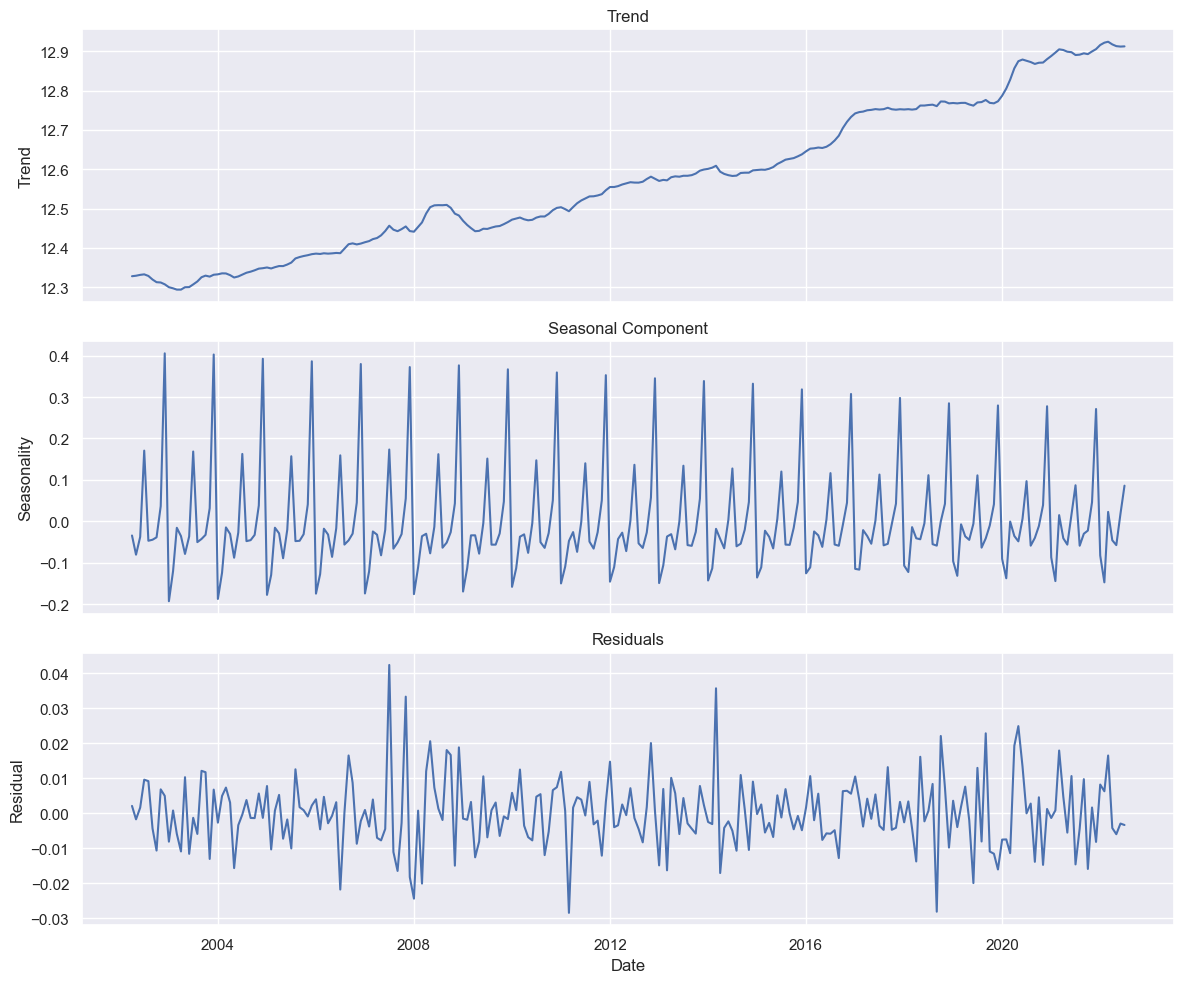

In [56]:
smoothed = result_with_shock.smoother_results
trend_smoothed = smoothed.smoothed_state[0]
seasonal_smoothed = smoothed.smoothed_state[2]

# （トレンド + 季節性）
reconstructed = trend_smoothed + seasonal_smoothed

# 残差
residuals = df['y'].values - reconstructed

sns.set_style('darkgrid')

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# トレンド
sns.lineplot(x=df['label'], y=trend_smoothed, ax=axes[0])
axes[0].set_title('Trend')
axes[0].set_ylabel('Trend')

# 季節成分
sns.lineplot(x=df['label'], y=seasonal_smoothed, ax=axes[1])
axes[1].set_title('Seasonal Component')
axes[1].set_ylabel('Seasonality')

# 残差
sns.lineplot(x=df['label'], y=residuals, ax=axes[2])
axes[2].set_title('Residuals')
axes[2].set_ylabel('Residual')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

### 運賃値上げ

In [61]:
df['rush_delivery'] = ((df['label'] >= '2017-07-01') & (df['label'] <= '2017-09-01')).astype(int)
df['delivery_price_up'] = ((df['label'] >= '2017-10-01') & (df['label'] <= '2019-12-01')).astype(int)

exog_df = df[['label', 'rush_delivery', 'delivery_price_up']]
exog_df

,label,rush_delivery,delivery_price_up
0,2002-04-01,0,0
1,2002-05-01,0,0
2,2002-06-01,0,0
3,2002-07-01,0,0
4,2002-08-01,0,0
...,...,...,...
239,2022-03-01,0,0
240,2022-04-01,0,0
241,2022-05-01,0,0
242,2022-06-01,0,0


# ハイパラ探索

In [48]:
# 評価関数の定義
import optuna

def objective(trial):
    # 各パラメータの候補（非負、logスケールで探索）
    obs_error     = trial.suggest_float('obs_error',     1e-5, 1.0, log=True)
    level_noise   = trial.suggest_float('level_noise',   1e-5, 1.0, log=True)
    slope_noise   = trial.suggest_float('slope_noise',   1e-6, 1.0, log=True)
    seasonal_noise= trial.suggest_float('seasonal_noise',1e-6, 1.0, log=True)

    # モデルインスタンスの生成
    model = LocalLinearTrendSeasonalModel(endog)
    
    # パラメータをフィット
    try:
        res = model.fit(start_params=[obs_error, level_noise, slope_noise, seasonal_noise], disp=False)
        return -res.llf  # 負の対数尤度（小さいほど良い）
    except Exception as e:
        return float('inf')  # エラー時は大きな値を返す


In [49]:
# 最適化の実行
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# 最適なパラメータ
print('Best params:', study.best_params)

[I 2025-05-22 10:24:25,471] A new study created in memory with name: no-name-82f74e39-a86a-4c1a-8612-128185a14f5e


c:\Users\fugat\Desktop\python_project\Transport_amount_project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

[I 2025-05-22 10:24:25,708] Trial 0 finished with value: -469.4513114731673 and parameters: {'obs_error': 0.00035781228089804646, 'level_noise': 0.003397362736189398, 'slope_noise': 0.000700066511796303, 'seasonal_noise': 0.4204976980615073}. Best is trial 0 with value: -469.4513114731673.
[I 2025-05-22 10:24:25,806] Trial 1 finished with value: -469.451112218575 and parameters: {'obs_error': 0.00600995538021819, 'level_noise': 0.00010495064139432341, 'slope_noise': 0.016467993877627853, 'seasonal_noise': 0.1806178936202187}. Best is trial 0 with value: -469.4513114731673.
[I 2025-05-22 10:24:25,979] Trial 2 finished with value: -469.45111467426267 and parameters: {'obs_error': 0.6283569239616941, 'level_noise': 8.952398871894616e-05, 'slope_noise': 0.16341396153905058, 'seasonal

Best params: {'obs_error': 0.00024755922609946885, 'level_noise': 0.0003176194674926275, 'slope_noise': 0.03635081302385502, 'seasonal_noise': 0.9741390048660676}


In [50]:
# 最適なパラメタで再度フィッティング

best_params = study.best_params
model_best = LocalLinearTrendSeasonalModel(endog)
res_best = model_best.fit(
    start_params=[best_params['obs_error'], 
                  best_params['level_noise'], 
                  best_params['slope_noise'], 
                  best_params['seasonal_noise']],
    disp=False
)
print(res_best.summary())


                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  244
Model:             LocalLinearTrendSeasonalModel   Log Likelihood                 469.451
Date:                           Thu, 22 May 2025   AIC                           -904.903
Time:                                   10:25:02   BIC                           -845.451
Sample:                                        0   HQIC                          -880.959
                                           - 244                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
obs_error          0.0002   4.94e-05      4.716      0.000       0.000       0.000
level_noise        0.0001   2.9